In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from comet_ml import Experiment
import os

In [18]:
pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 168 kB 40.0 MB/s 
     |████████████████████████████████| 130 kB 46.4 MB/s 
     |████████████████████████████████| 498 kB 42.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 140 kB 53.8 MB/s 
     |████████████████████████████████| 127 kB 53.9 MB/s 
     |████████████████████████████████| 168 kB 67.0 MB/s 
     |████████████████████████████████| 166 kB 70.3 MB/s 
     |████████████████████████████████| 166 kB 56.7 MB/s 
     |████████████████████████████████| 162 kB 62.4 MB/s 
     |████████████████████████████████| 162 kB 56.0 MB/s 
     |████████████████████████████████| 158 kB 64.5 MB/s 
     |████████████████████████████████| 157 kB 50.1 MB/s 
     |██████████████████████████████

In [3]:
df_train = pd.read_csv("train_2015_2018.csv")
df_test = pd.read_csv("test_2019.csv")

In [4]:

#1df_train = df_train[df_train.str.contains==False]
columns = ['period', 'coordinate_x', 'coordinate_y', 'empty_net','last_coord_x', 'last_coord_y', 'last_period',
       'number_friendly', 'number_opposing',
       'power_play', 'distance', 'from_last_distance', 'angle', 'last_angle',
       'time_from_last', 'change_angle']

In [5]:
df_train

,Unnamed: 0,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,...,number_friendly,number_opposing,power_play,distance,from_last_distance,angle,last_angle,time_from_last,change_angle,speed
0,0,7,00:51,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-55.0,6.0,...,5,5,0,34.5254,154.275727,0.1747,1.4248,51,0.0000,0.000000
1,1,9,01:05,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-79.0,0.0,...,5,5,0,10.0000,50.477718,0.0000,0.4939,65,0.0000,0.000000
2,2,10,01:06,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-75.0,-1.0,...,5,5,0,14.0357,4.123106,0.0713,0.0000,6,0.0713,0.687184
3,3,13,01:53,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-55.0,-36.0,...,5,5,0,49.5177,79.605276,0.8140,1.5137,53,0.0000,0.000000
4,4,21,02:37,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-61.0,-1.0,...,5,5,0,28.0179,22.472205,0.0357,0.8330,37,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,332737,276,15:22,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,1,-77.0,7.0,...,5,5,0,13.8924,33.600595,0.5281,0.8157,82,0.0000,0.000000
332738,332738,279,15:51,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-69.0,7.0,...,5,5,0,21.1896,36.013886,0.3367,0.9441,51,0.0000,0.000000
332739,332739,280,15:55,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-65.0,-4.0,...,5,5,0,24.3311,11.704700,0.1651,0.3367,55,0.1716,0.212813
332740,332740,284,16:50,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,42.0,3.0,...,5,5,0,47.0956,NaN,0.0637,NaN,50,0.0000,0.000000


In [6]:
df_test = df_test.fillna(0)
test_data = df_test[columns]
test_label = df_test['is_goal']

In [7]:
df_prep = df_train.fillna(0)
y = df_prep['is_goal']
X = df_prep[columns].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [8]:
X

,period,coordinate_x,coordinate_y,empty_net,last_coord_x,last_coord_y,last_period,number_friendly,number_opposing,power_play,distance,from_last_distance,angle,last_angle,time_from_last,change_angle
0,1.0,-55.0,6.0,0.0,94.0,-34.0,1.0,5.0,5.0,0.0,34.5254,154.275727,0.1747,1.4248,51.0,0.0000
1,1.0,-79.0,0.0,0.0,-37.0,-28.0,1.0,5.0,5.0,0.0,10.0000,50.477718,0.0000,0.4939,65.0,0.0000
2,1.0,-75.0,-1.0,0.0,-79.0,0.0,1.0,5.0,5.0,0.0,14.0357,4.123106,0.0713,0.0000,6.0,0.0713
3,1.0,-55.0,-36.0,0.0,-91.0,35.0,1.0,5.0,5.0,0.0,49.5177,79.605276,0.8140,1.5137,53.0,0.0000
4,1.0,-61.0,-1.0,0.0,-69.0,-22.0,1.0,5.0,5.0,0.0,28.0179,22.472205,0.0357,0.8330,37.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,3.0,-77.0,7.0,0.0,-57.0,34.0,3.0,5.0,5.0,0.0,13.8924,33.600595,0.5281,0.8157,82.0,0.0000
332738,3.0,-69.0,7.0,0.0,-68.0,-29.0,3.0,5.0,5.0,0.0,21.1896,36.013886,0.3367,0.9441,51.0,0.0000
332739,3.0,-65.0,-4.0,0.0,-69.0,7.0,3.0,5.0,5.0,0.0,24.3311,11.704700,0.1651,0.3367,55.0,0.1716
332740,3.0,42.0,3.0,0.0,0.0,0.0,3.0,5.0,5.0,0.0,47.0956,0.000000,0.0637,0.0000,50.0,0.0000


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266193, 16)
(266193,)
(66549, 16)
(66549,)


In [22]:
os.environ['COMET_API_KEY'] = 'c2REbE8eQaoRTP059ajV8VYn9'


In [24]:
COMET_API_KEY = os.environ.get("COMET_API_KEY")

In [25]:
experiment = Experiment(
    api_key=COMET_API_KEY,
    project_name="ift-6758",
    workspace="ift-6758-2",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/ift-6758-2/ift-6758/208016e6d69d4c608fd00c00a005956b



# Logistic Regression 

In [10]:
pca = PCA()
X_train = StandardScaler().fit_transform(X_train)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print(sum(explained_variance[0:15]))

16
1.0


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameter (CV score=0.911):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 13}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


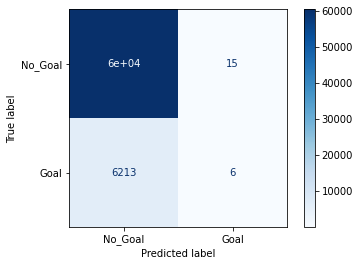

In [11]:
pca = PCA()


# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", pca), ("logistic", logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [7 ,10, 11,13],
    "logistic__C": np.logspace(-4, 4, 4),
}

search_logR = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=10)
search_logR.fit(X_train, y_train)



print("Best parameter (CV score=%0.3f):" % search_logR.best_score_)
print(search_logR.best_params_)



ConfusionMatrixDisplay.from_estimator(search_logR, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [28]:
acc_score = search_logR.score(test_data,test_label)
experiment.log_metric("Accuracy score Logistic Regression", acc_score)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [60]:
acc_score

0.9034887026683093

In [26]:
y_predict = search_logR.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [30]:
experiment.log_confusion_matrix(test_label,y_predict)

{'web': 'https://www.comet.com/api/asset/download?assetId=feb74c34930440899e980d49f3e7caa8&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=feb74c34930440899e980d49f3e7caa8&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'assetId': 'feb74c34930440899e980d49f3e7caa8'}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


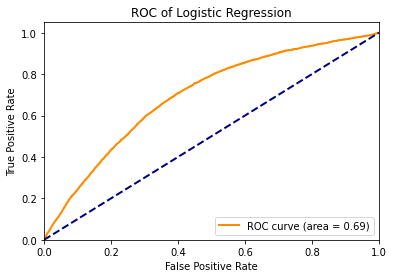

{'web': 'https://www.comet.com/api/asset/download?assetId=ed104ebdd45f4460a8a5628414bd35c7&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=ed104ebdd45f4460a8a5628414bd35c7&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'assetId': 'ed104ebdd45f4460a8a5628414bd35c7'}

In [31]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_logR.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")


plt.show()
experiment.log_curve(f"ROC - Logistic Regression",fpr, tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


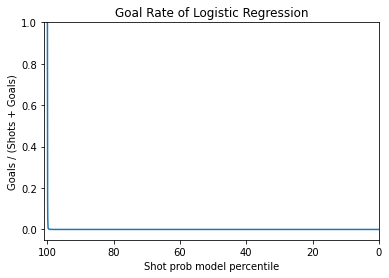

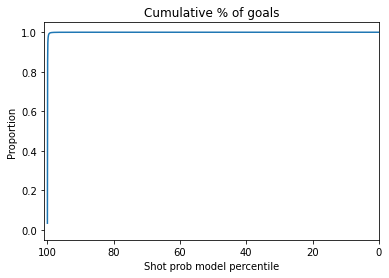

In [34]:
#model percentile
lr_probs = search_logR.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100


#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.05, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression")
plt.savefig('Goal Rate of Logistic Regression.png')
plt.show()


#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.05, 1.05])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig('Cumulative % of goals.png')
plt.show()



In [35]:
experiment.log_image('Goal Rate of Logistic Regression.png')
experiment.log_image('Cumulative % of goals.png')

{'web': 'https://www.comet.com/api/image/download?imageId=a52ee4551eb94ac590c5d4c13b8e60e2&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a52ee4551eb94ac590c5d4c13b8e60e2&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'imageId': 'a52ee4551eb94ac590c5d4c13b8e60e2'}

In [15]:
from sklearn.calibration import CalibrationDisplay

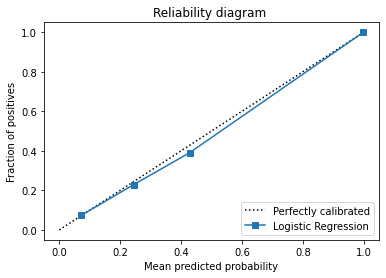

{'web': 'https://www.comet.com/api/image/download?imageId=57f36cc7b5dc4e1ab2af6055b0442a02&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=57f36cc7b5dc4e1ab2af6055b0442a02&experimentKey=208016e6d69d4c608fd00c00a005956b',
 'imageId': '57f36cc7b5dc4e1ab2af6055b0442a02'}

In [37]:
disp = CalibrationDisplay.from_estimator(search_logR, X_train, y_train, name='Logistic Regression')
plt.title("Reliability diagram ")
plt.savefig('Reliability diagram.png')
plt.show()
#experiment.log_curve(f"Reliability diagram Logistic Regression",disp)
experiment.log_image('Reliability diagram.png')

In [38]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ift-6758-2/ift-6758/208016e6d69d4c608fd00c00a005956b
COMET INFO:   Metrics:
COMET INFO:     Accuracy score Logistic Regression : 0.9034887026683093
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1A6U0XzL0axSkXI5zJ09cR7pEjgmQaPJ7
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix    : 1
COMET INFO:     curve               : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     images              : 3
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging f

# SVC

In [ ]:
from sklearn.svm import SVC

0.9100512404393755


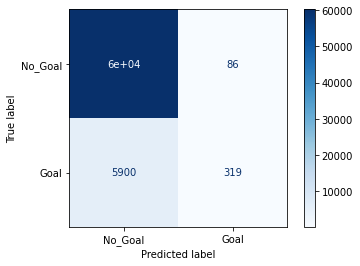

In [ ]:
from sklearn.svm import SVC

search_svc = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 15)), ("svc", SVC(kernel='rbf',C=10))])



X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=0)

search_svc.fit(X_test_svm, y_test_svm)



print(search_svc.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_svc, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [ ]:
search_svc.score(test_data,test_label)

0.907468829111782

In [ ]:
lr_probs = search_svc.predict(X_test)
lr_probs

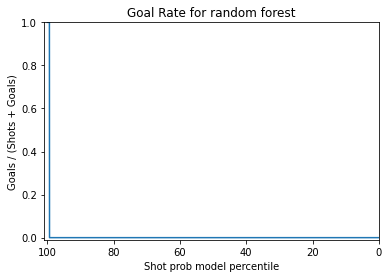

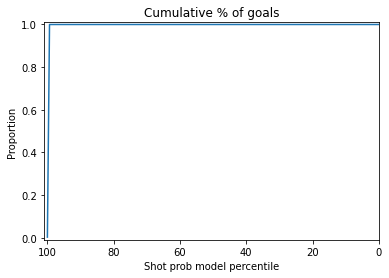

In [ ]:
#model percentile
#lr_probs = search_svc.predict(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate for random forest")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

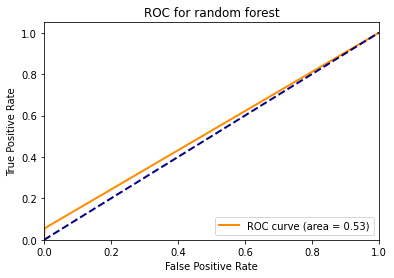

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = search_svc.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for random forest")
plt.legend(loc="lower right")


plt.show()

In [ ]:
disp = CalibrationDisplay.from_estimator(search_svc, X_train, y_train, name='SVC ')
plt.title("Reliability diagram")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6034951689732377


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


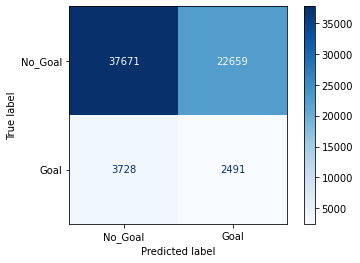

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators = 200, max_features = 'sqrt', oob_score = True) 

search_rf = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 13)), ("rfc",rfc)])


search_rf.fit(X_train, y_train)

print(search_rf.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_rf, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [ ]:
search_rf.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6106380386370097

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


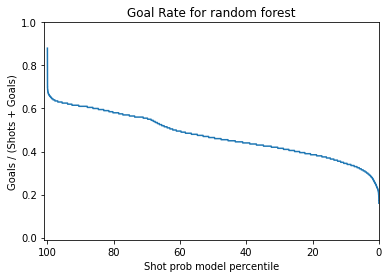

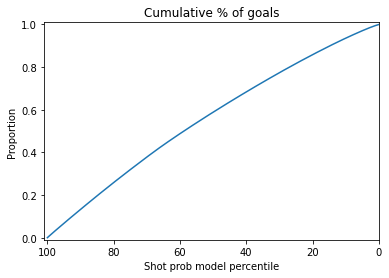

In [ ]:
#model percentile
lr_probs = search_rf.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate for random forest")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

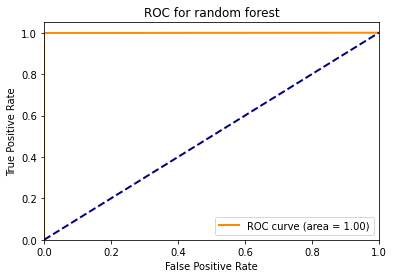

In [ ]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_rf.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for random forest")
plt.legend(loc="lower right")


plt.show()

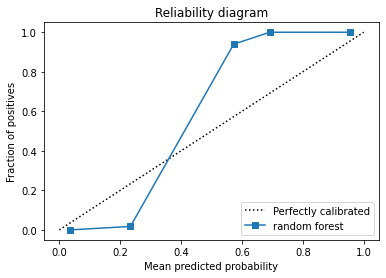

In [ ]:
disp = CalibrationDisplay.from_estimator(search_rf, X_train, y_train, name='random forest ')
plt.title("Reliability diagram")
plt.show()

# ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter (CV score=0.911):
{'ada__learning_rate': 0.01, 'ada__n_estimators': 10}
Grid scores on development set:

0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 15}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 15}
0.911 (+/-0.002) for {'ada__learning_rate': 1, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 1, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 1, 'ada__n_estimators': 15}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


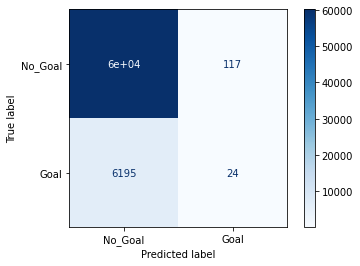

In [ ]:
ada = AdaBoostClassifier()

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 14)), ("ada",ada)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'ada__n_estimators': [10,12,15],
    'ada__learning_rate': [0.01,0.1,1]
}


search_ada = GridSearchCV(pipe, param_grid, n_jobs=-1,verbose=10)
search_ada.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_ada.best_score_)
print(search_ada.best_params_)


means = search_ada.cv_results_['mean_test_score']
stds = search_ada.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_ada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_ada, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


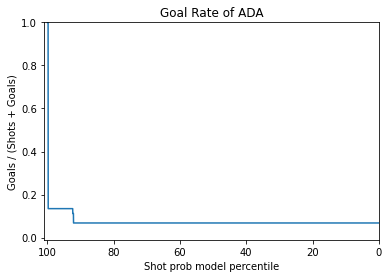

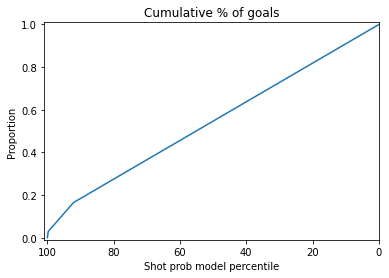

In [ ]:
#model percentile
lr_probs = search_ada.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of ADA")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

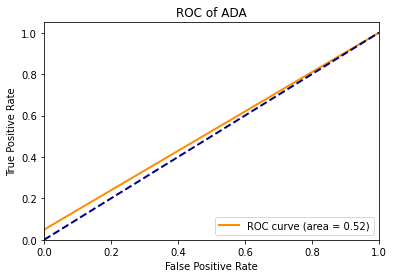

In [ ]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_ada.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of ADA")
plt.legend(loc="lower right")


plt.show()

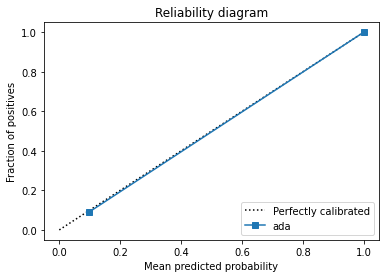

In [ ]:
disp = CalibrationDisplay.from_estimator(search_ada, X_train, y_train, name='ada')
plt.title("Reliability diagram")
plt.show()

In [ ]:
search_ada.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9023921372195974

# NN

In [45]:
experiment_NN = Experiment(
    api_key=COMET_API_KEY,
    project_name="ift-6758",
    workspace="ift-6758-2",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/ift-6758-2/ift-6758/9079de8588a74001b6b6c4c379994abc



In [39]:
from sklearn.neural_network import MLPClassifier

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 0.29865589
Validation score: 0.910669
Iteration 2, loss = 0.27094373
Validation score: 0.910669
Iteration 3, loss = 0.26982597
Validation score: 0.910669
Iteration 4, loss = 0.26939256
Validation score: 0.910669
Iteration 5, loss = 0.26911523
Validation score: 0.910669
Iteration 6, loss = 0.26897999
Validation score: 0.910669
Iteration 7, loss = 0.26886802
Validation score: 0.910669
Iteration 8, loss = 0.26867571
Validation score: 0.910744
Iteration 9, loss = 0.26857672
Validation score: 0.910669
Iteration 10, loss = 0.26854865
Validation score: 0.910669
Iteration 11, loss = 0.26844731
Validation score: 0.910669
Iteration 12, loss = 0.26841346
Validation score: 0.910669
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best parameter (CV score=0.911):
{'mlp__hidden_layer_sizes': (20, 20, 20)}
Grid scores on development set:

0.911 (+/-0.001) for {'mlp__hidden_layer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


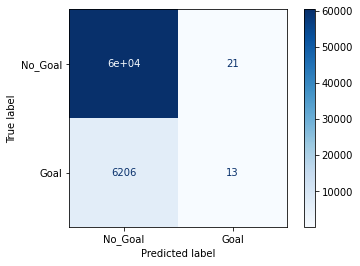

In [40]:
mlp = MLPClassifier(batch_size=500, activation = 'relu', learning_rate='adaptive', max_iter=200, verbose=True,  early_stopping=True)


pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 13)), ("mlp",mlp)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameter_space = {
    'mlp__hidden_layer_sizes': [(60,60),(20,20,20),(100,100),(200)],
}


search_mlp = GridSearchCV(pipe, parameter_space, n_jobs=-1, verbose=10)
search_mlp.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_mlp.best_score_)
print(search_mlp.best_params_)

print("Grid scores on development set:")
print()
means = search_mlp.cv_results_['mean_test_score']
stds = search_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_mlp, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [49]:
acc_NN = search_mlp.score(test_data,test_label)
pred_NN = search_mlp.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [61]:
acc_NN

0.9032720971475761

In [51]:
experiment_NN.log_metric("Accuracy score Neural Networks", acc_NN)
experiment_NN.log_confusion_matrix(test_label,pred_NN)

{'web': 'https://www.comet.com/api/asset/download?assetId=6beb2b2c87d348298922b6e548fdf513&experimentKey=9079de8588a74001b6b6c4c379994abc',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=6beb2b2c87d348298922b6e548fdf513&experimentKey=9079de8588a74001b6b6c4c379994abc',
 'assetId': '6beb2b2c87d348298922b6e548fdf513'}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


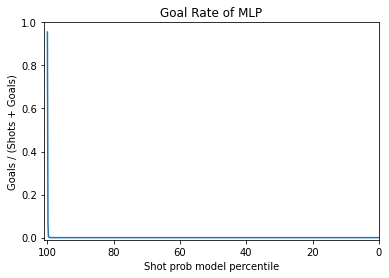

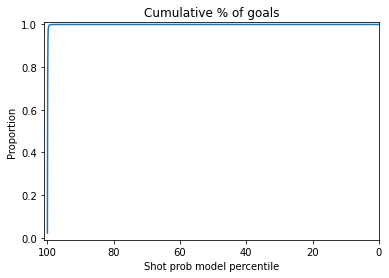

In [52]:
#model percentile
lr_probs = search_mlp.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of MLP")
plt.savefig('Goal Rate of MLP.png')
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.savefig("Cumulative % of goals MLP")
plt.show()

In [53]:
experiment.log_image('Goal Rate of MLP.png')
experiment.log_image('Cumulative % of goals MLP.png')

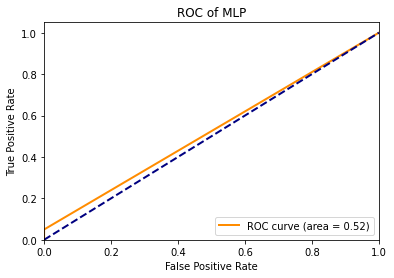

In [54]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_mlp.predict(X_train)
fpr_nn, tpr_nn, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr_nn, tpr_nn)

plt.figure()
lw = 2
plt.plot(
    fpr_nn,
    tpr_nn,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of MLP")
plt.legend(loc="lower right")


plt.show()

In [55]:
experiment.log_curve(f"ROC - MLP",fpr_nn, tpr_nn)

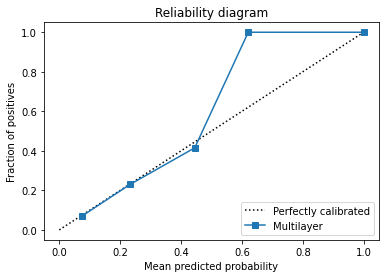

In [56]:
disp = CalibrationDisplay.from_estimator(search_mlp, X_train, y_train, name='Multilayer')
plt.title("Reliability diagram")
plt.savefig("Reliability diagram_MLP")
plt.show()

In [57]:
experiment.log_image('Reliability diagram.png')

In [58]:
experiment_NN.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ift-6758-2/ift-6758/9079de8588a74001b6b6c4c379994abc
COMET INFO:   Metrics:
COMET INFO:     Accuracy score Neural Networks : 0.9032720971475761
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1A6U0XzL0axSkXI5zJ09cR7pEjgmQaPJ7
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix    : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metric